In [22]:
# import library
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# read data
df = pd.read_csv("titanic.csv")

In [24]:
# write the shape
print( df.shape)

(891, 12)


In [25]:
# print the values count of columns expect na values
print( df.count() )

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [26]:
# print the na values count of columns
print( df.isna().sum() )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


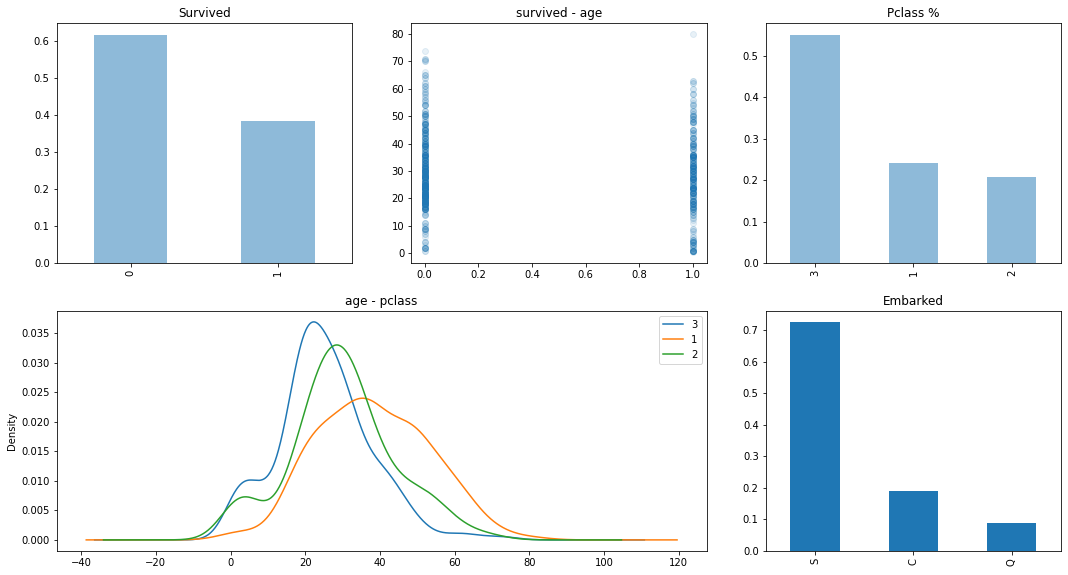

In [27]:
####### plot some graphs
# create figure
                        # (width, height)
fig = plt.figure(figsize=(18,15))

                #size   #position
plt.subplot2grid((3,3), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3,3), (0,1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.title("survived - age")

plt.subplot2grid((3,3), (0,2))
df.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Pclass %")


plt.subplot2grid((3,3), (1,0), colspan=2)
for i in df.Pclass.unique():
    df.Age[df.Pclass == i].plot(kind="kde") # kernel density estimaiton
plt.legend(df.Pclass.unique())
plt.title("age - pclass")


plt.subplot2grid((3,3), (1,2))
df.Embarked.value_counts(normalize=True).plot(kind="bar")
plt.title("Embarked")



plt.show()

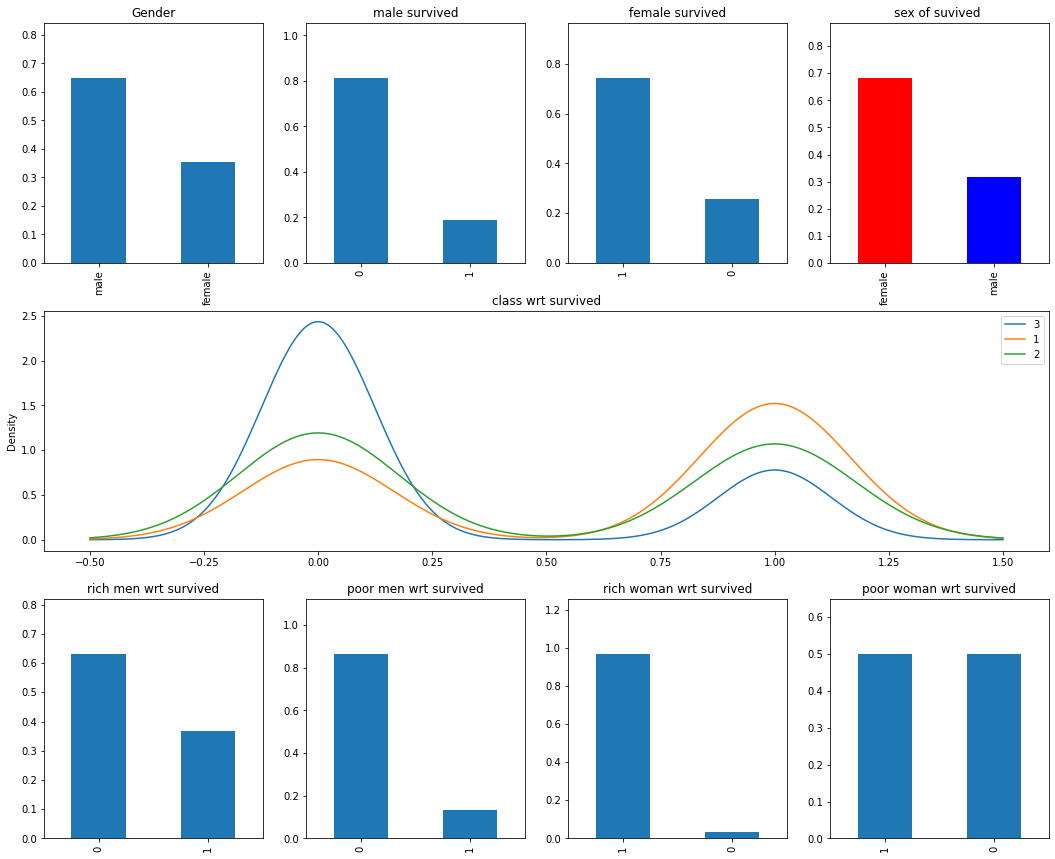

In [28]:
plt.figure(figsize=(18,15))

plt.subplot2grid((3,4), (0,0))
df.Sex.value_counts(normalize=True).plot(kind="bar")
plt.title("Gender")
plt.margins(0.3)

plt.subplot2grid((3,4), (0,1))
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind="bar")
plt.title("male survived")
plt.margins(0.3)


plt.subplot2grid((3,4), (0,2))
df.Survived[df.Sex=="female"].value_counts(normalize=True).plot(kind="bar")
plt.title("female survived")
plt.margins(0.3)


plt.subplot2grid((3,4), (0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind="bar", color=['r', 'b'])
plt.title("sex of suvived ")
plt.margins(0.3)


plt.subplot2grid((3,4), (1,0), colspan=4)
for i in df.Pclass.unique():
    df.Survived[df.Pclass == i].plot(kind="kde")
plt.legend(df.Pclass.unique())
plt.title("class wrt survived")


plt.subplot2grid((3,4), (2,0))
df.Survived[ (df.Sex=="male") & (df.Pclass == 1) ].value_counts(normalize=True).plot(kind="bar")
plt.title("rich men wrt survived")
plt.margins(0.3)


plt.subplot2grid((3,4), (2,1))
df.Survived[ (df.Sex=="male") & (df.Pclass == 3) ].value_counts(normalize=True).plot(kind="bar")
plt.title("poor men wrt survived")
plt.margins(0.3)


plt.subplot2grid((3,4), (2,2))
df.Survived[ (df.Sex=="female") & (df.Pclass == 1) ].value_counts(normalize=True).plot(kind="bar")
plt.title("rich woman wrt survived")
plt.margins(0.3)


plt.subplot2grid((3,4), (2,3))
df.Survived[ (df.Sex=="female") & (df.Pclass == 3) ].value_counts(normalize=True).plot(kind="bar")
plt.title("poor woman wrt survived")
plt.margins(0.3)

plt.show()

In [29]:
## clean data
##" fill na with mean value"
df["Age"]  = df["Age"].fillna(df["Age"].mean())
## fill na with s value of embarked column
df["Embarked"] = df.Embarked.fillna("S")
### delete the cabin, PassengerId, name and ticket columns
df.drop(["Cabin", "PassengerId", "Name", "Ticket"], inplace=True, axis=1)

In [30]:
## encode data
df["Sex"][df["Sex"] == "male"] = 1
df["Sex"][df["Sex"] == "female"] = 0
####
df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2

In [31]:
## split the data
#X_train, X_test, Y_train, Y_test = train_test_split(target, labels, test_size=.3, random_state=3, shuffle=True)
df["Sex"] = df["Sex"].astype(int)
df["Embarked"] = df["Embarked"].astype(int)

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
## import models
from sklearn.linear_model import LogisticRegression

In [33]:
target = df["Survived"]
label = df.drop(["Survived"], axis=1)

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(label, target, test_size=.3)

In [51]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8022388059701493

In [61]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=3)
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.8171641791044776

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.7910447761194029

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2, max_depth=3)
rfc.fit(X_train, Y_train)
rfc.score(X_test, Y_test)

0.8246268656716418

In [86]:
### cross validation using KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

k = np.arange(1,30)
knn = KNeighborsClassifier()
train_score, val_score = validation_curve(knn, X_train, Y_train, param_name="n_neighbors", param_range=k, cv=5)

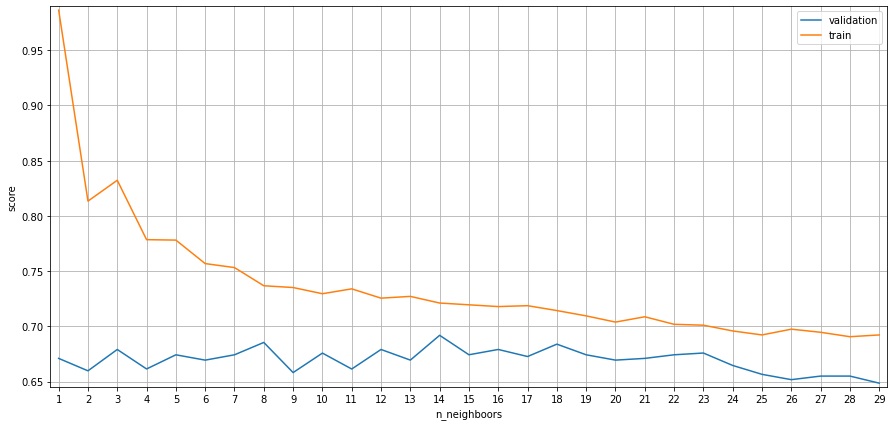

In [99]:
fig = plt.figure(figsize=(15,7))
plt.margins(.01)
plt.xticks(k)
plt.plot(k, val_score.mean(axis=1), label="validation")
plt.plot(k, train_score.mean(axis=1), label="train")
plt.legend(["validation", "train"])
plt.ylabel("score")
plt.xlabel("n_neighboors")
plt.grid(b=True)
plt.show()

In [100]:
## 14 is the best value for n_neighboors parameter
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [101]:
pred = knn.predict(X_test)

In [102]:
accuracy_score(Y_test, pred)

0.75

In [103]:
### try cross validation with multi-hyperparameter using knn model
from sklearn.model_selection import GridSearchCV
# shooce parameter
param_grid = {
    'n_neighbors': np.arange(10,16),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([10, 11, 12, 13, 14, 15])})

In [105]:
print("best score",grid.best_score_)
print("best hyper-parameters", grid.best_params_)

best score 0.7031612903225806
best hyper-parameters {'metric': 'manhattan', 'n_neighbors': 14}


In [106]:
## save the model
model = grid.best_estimator_

In [107]:
### tester the model
model.score(X_test, Y_test)

0.7649253731343284

In [118]:
#### connaitre le nombres maximal de données
from sklearn.model_selection import learning_curve
                                                        # get 7 values from 0.1 to 1 (it's the percentage of samples data)
n, train_score, val_score = learning_curve(model, X_train, Y_train, train_sizes=np.linspace(0.1,1.0, 10), cv=10 )

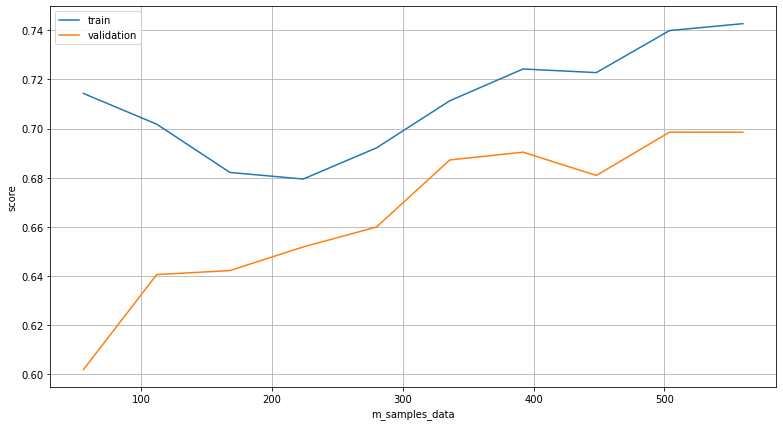

In [122]:
fig = plt.figure(figsize=(13,7))
plt.plot(n, train_score.mean(axis=1), label="train")
plt.plot(n, val_score.mean(axis=1), label="validation")
plt.legend(["train", "validation"])
plt.ylabel("score")
plt.xlabel("m_samples_data")
plt.grid(b=True)
plt.show()

In [123]:
### i dion't know what going on here, why the curve is like that :'(